# Notes on Outliers 📊

Outliers are data points that are very different from the rest of the data. They can affect the results of your analysis, so it's important to understand them. Here's a simple breakdown:

### Types of Outliers 🔍

1. **Univariate Outliers** 📈  
    These are unusual values in a single variable. For example, if most people's height is between 5-6 feet, but one person is 8 feet tall, that's a univariate outlier.

2. **Multivariate Outliers** 📊  
    These occur when a combination of variables is unusual. For instance, a person with a very high income but very low education level might be a multivariate outlier.

3. **Global Outliers** 🌍  
    These are extreme values that are far away from all other data points. For example, a temperature of 60°C in a dataset where most temperatures are between 20-30°C.

4. **Contextual Outliers** 🕵️‍♂️  
    These depend on the context. For example, 40°C might be normal in summer but an outlier in winter.

5. **Collective Outliers** 👥  
    A group of data points that together behave unusually. For example, a sudden spike in website traffic at midnight.

### Why Outliers Happen? 🤔
- **Errors in data collection** 📝  
- **Natural variation** 🌱  
- **Unusual events** 🌟  

### What to Do with Outliers? 🛠️
- Investigate them to see if they are errors.  
- Decide whether to keep, remove, or transform them based on your analysis goals.  

Outliers can teach us a lot, but they can also mislead us. Always handle them carefully! 😊

## 🔹 Basic Methods to Remove Outliers
## 1. Visualization se Outliers pakarna (Basic level)  
📊 a) Box Plot (a.k.a. Tukri Chart 😅)

Box plot easily outliers ko dikhata hai. Jo points box se bahar hotay hain, woh outliers hote hain.

### Example:  
Using the `data` variable, we can visualize outliers with a box plot. Refer to the code in the cell below for implementation.

In [35]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns

# Create a DataFrame of single variable data
df = pd.DataFrame({"Age" : [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50] })



<Axes: >

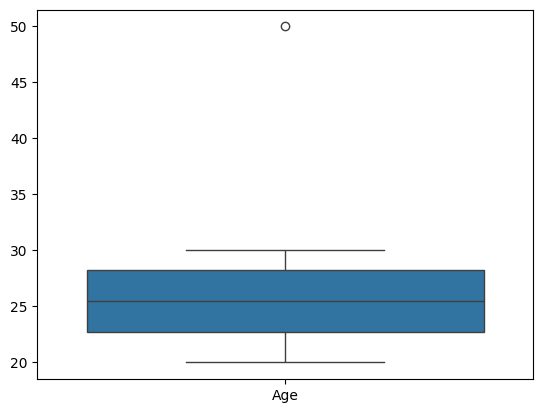

In [36]:
# Step 1:
# Checking outliers using boxplot
sns.boxplot(data=df)

# Method 1:

Z-Score Method se Outliers ko samajhna bohot asaan hai! 😎

### Z-Score Kya Hai? 🤔
Z-Score ek statistical measure hai jo batata hai ke ek data point apne mean se kitna door hai, standard deviation ke terms mein. Agar Z-Score bohot zyada ya bohot kam ho, toh woh data point outlier ho sakta hai. 🚀

### Formula:  
**Z-Score = (Data Point - Mean) / Standard Deviation**  

### Steps: 🛠️  
1. **Mean aur Standard Deviation Calculate karo** 🧮  
    Har data point ka Z-Score nikalne ke liye pehle mean aur standard deviation calculate karna zaroori hai.

2. **Z-Score Calculate karo** 📊  
    Har data point ka Z-Score nikal lo using the formula.

3. **Threshold Set karo** 🎯  
    Usually, Z-Score > 3 ya Z-Score < -3 ko outlier consider kiya jata hai.

4. **Outliers Identify karo** 🔍  
    Jo data points threshold ke bahar ho, woh outliers hain.

5. **Outliers Remove karo (Optional)** 🗑️  
    Agar analysis ke liye zaroori ho, toh outliers ko remove kar do.

### Example:  
Humne `Age` ka Z-Score calculate kiya aur threshold set kiya 3. Jo points Z-Score > 3 ya Z-Score < -3 hain, woh outliers hain. 👇



In [ ]:
# Step 2:

# Calculate the mean and Standard Deviation
df["mean"] = np.mean(df["Age"])
df["std"] = np.std(df["Age"])


# Step 3:
# Calculate the z-score for each data point
df["z_score"] = (df["Age"] - df["mean"]) / df["std"]


# Step 4:
print("-------------------------------------------------")
print(f"Here is the DataFrame with with and without outliers \n{df}")
print("-------------------------------------------------")
# Step 5:
# Identify outliers using z-score threshold of 3
print("------------------------------------------------")
print(f"Outliers using z-score threshold of 3 \n{df[(df['z_score'] > 3) | (df['z_score'] < -3)]}")
print("-------------------------------------------------")
# Step 5:
# Remove outliers
df_no_outliers = df[(df["z_score"] <= 3)]
print("-------------------------------------------------")
print(df_no_outliers)
print("-------------------------------------------------")

## Method 2:

In [57]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

# Step 1:
# create DataFrame of single variable data
df = pd.DataFrame({"Hight" : [4.5 ,5.4, 4.3, 5.3, 5.2, 5.5, 5.1, 8.4] })

# Step 2:
# Calculate z-score for each data point using scipy.stats
df["Z_score"] = stats.zscore(df["Hight"])

# Step 3:
# Set threshold for z-score
threshold = 2.3

# Step 4:
# Identify outliers using z-score threshold of 2.3
outliers = np.where(df["Z_score"] > threshold)[0]

# Step 5:
print("-------------------------------------------------")
print(f"print Data Points\n{df}")
print("-------------------------------------------------")

print(f"Indeces of outliers{outliers}")
print(f"Outliers Values\n{df.iloc[outliers]}")

# Step 6:
# Remove outliers from the DataFrame
df= df[df["Z_score"] <= threshold]
print("-------------------------------------------------")
print(f"DataFrame without outliers\n{df}")
print("-------------------------------------------------")  

-------------------------------------------------
print Data Points
   Hight   Z_score
0    4.5 -0.815694
1    5.4 -0.052967
2    4.3 -0.985189
3    5.3 -0.137715
4    5.2 -0.222462
5    5.5  0.031780
6    5.1 -0.307210
7    8.4  2.489457
-------------------------------------------------
Indeces of outliers[7]
Outliers Values
   Hight   Z_score
7    8.4  2.489457
-------------------------------------------------
DataFrame without outliers
   Hight   Z_score
0    4.5 -0.815694
1    5.4 -0.052967
2    4.3 -0.985189
3    5.3 -0.137715
4    5.2 -0.222462
5    5.5  0.031780
6    5.1 -0.307210
-------------------------------------------------


## Method 3: IQR 
## IQR Method se Outliers ko pakarna! 🇵🇰✨

### IQR Kya Hai? 🤔  
IQR ka matlab hai **Interquartile Range**. Yeh ek statistical measure hai jo data ke middle 50% ko represent karta hai. Iska use karke hum outliers ko identify karte hain. 🚀  

### Formula:  
**IQR = Q3 - Q1**  
Yahan:  
- **Q1** (First Quartile) = Data ka 25th percentile  
- **Q3** (Third Quartile) = Data ka 75th percentile  

### Steps: 🛠️  
1. **IQR Calculate karo** 🧮  
    IQR nikalne ke liye Q3 aur Q1 ka difference lo.  
    **IQR = Q3 - Q1**  

2. **Lower aur Upper Bound Set karo** 🎯  
    - **Lower Bound = Q1 - (1.5 * IQR)**  
    - **Upper Bound = Q3 + (1.5 * IQR)**  

3. **Outliers Identify karo** 🔍  
    Jo data points lower bound se neeche ya upper bound se upar ho, woh outliers hain.  

4. **Outliers Remove karo (Optional)** 🗑️  
    Agar zarurat ho, toh outliers ko remove kar do.  

### Example:  
Humne `Age` ka IQR calculate kiya aur lower aur upper bounds set kiye. Jo points bounds ke bahar hain, woh outliers hain. 👇

In [72]:
# import libraries
import pandas as pd
import numpy as np  
from scipy import stats
import seaborn as sns

# Step 1:
# Create a DataFrame of single variable data
df = pd.DataFrame({"Age" : [11,20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50] })

# Step 2:
# find the IQR
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

# Step 3:
# Set the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 4:
# Identify outliers using IQR method
print("-------------------------------------------------")
print(f"Outliers using IQR method\n{df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]}")

# Step 5:
# Remove outliers from the DataFrame
df = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]
print("-------------------------------------------------")  
print(f"DataFrame without outliers\n{df}")
print("-------------------------------------------------")


-------------------------------------------------
Outliers using IQR method
    Age
0    11
12   50
-------------------------------------------------
DataFrame without outliers
    Age
1    20
2    21
3    22
4    23
5    24
6    25
7    26
8    27
9    28
10   29
11   30
-------------------------------------------------
